### **EDA Of The GLDAS Dataset Of Bhopal City**

#### **Importing Necessary Libraries**

In [243]:

# data importing & processing
import os
import pandas as pd
from datetime import date

# dash & ploting
import dash
from dash import dcc, html, callback, Output, Input
from dash.dependencies import Input, Output
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

#### **Basic Data Analysis**

In [244]:
df = pd.read_csv("E:\Placement Prep\ML and DS\Data Science\Omdena\Local Chapters\Water Management & Forecasting - Algeria & Bhopal\DagsHub Repo\AlgeriaBhopal_WaterManagementandForecasting\src\data\processed\Weather data\GLDAS_&_GFS\GLDAS_Bhopal_2010_2023.csv")

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4929 entries, 0 to 4928
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               4929 non-null   object 
 1   city               4929 non-null   object 
 2   ACond_tavg         4929 non-null   float64
 3   AvgSurfT_tavg      4929 non-null   float64
 4   CanopInt_tavg      4929 non-null   float64
 5   ECanop_tavg        4929 non-null   float64
 6   ESoil_tavg         4929 non-null   float64
 7   EvapSnow_tavg      4929 non-null   float64
 8   Evap_tavg          4929 non-null   float64
 9   GWS_tavg           4929 non-null   float64
 10  Lwnet_tavg         4929 non-null   float64
 11  Qg_tavg            4929 non-null   float64
 12  Qh_tavg            4929 non-null   float64
 13  Qle_tavg           4929 non-null   float64
 14  Qsb_tavg           4929 non-null   float64
 15  Qsm_tavg           4929 non-null   float64
 16  Qs_tavg            4929 

In [246]:
df.head()

date    city  ACond_tavg  AvgSurfT_tavg  CanopInt_tavg   ECanop_tavg  \
0  10-01-01  Bhopal    0.010088     287.688380       0.001156  2.932935e-08   
1  10-01-02  Bhopal    0.010061     289.268913       0.000401  2.920452e-09   
2  10-01-03  Bhopal    0.010747     292.449339       0.000948  7.901975e-09   
3  10-01-04  Bhopal    0.011983     289.668102       0.000724  1.918644e-08   
4  10-01-05  Bhopal    0.010241     287.474046       0.000275  1.576623e-09   

   ESoil_tavg  EvapSnow_tavg  Evap_tavg    GWS_tavg  ...       Qs_tavg  \
0    0.000012            0.0   0.000015  883.827648  ...  0.000000e+00   
1    0.000012            0.0   0.000015  883.432609  ...  0.000000e+00   
2    0.000014            0.0   0.000017  883.026668  ...  3.507778e-10   
3    0.000011            0.0   0.000013  882.605022  ...  0.000000e+00   
4    0.000011            0.0   0.000013  882.173136  ...  0.000000e+00   

   SnowDepth_tavg  SnowT_tavg  SoilMoist_P_tavg  SoilMoist_RZ_tavg  \
0             0.0  287.688380       1172.228199         288.400510   
1             0.0  289.268913       1171.363238         287.930671   
2             0.0  292.449339       1170.347264         287.320660   
3             0.0  289.668102       1169.410008         286.805072   
4             0.0  287.474046       1168.653461         286.480318   

   SoilMoist_S_tavg  SWE_tavg  Swnet_tavg  TVeg_tavg     TWS_tavg  
0          5.566383       0.0  151.129770   0.000002  1172.229304  
1          5.547952       0.0  145.878682   0.000002  1171.363680  
2          5.488808       0.0  141.945173   0.000003  1170.348275  
3          5.509292       0.0  146.034988   0.000002  1169.410822  
4          5.510678       0.0  153.171961   0.000002  1168.653736  

[5 rows x 26 columns]

In [247]:
# sorting the dataframe on the basis of the date column
df = df.sort_values(by='date')
df.head()

date    city  ACond_tavg  AvgSurfT_tavg  CanopInt_tavg   ECanop_tavg  \
0  10-01-01  Bhopal    0.010088     287.688380       0.001156  2.932935e-08   
1  10-01-02  Bhopal    0.010061     289.268913       0.000401  2.920452e-09   
2  10-01-03  Bhopal    0.010747     292.449339       0.000948  7.901975e-09   
3  10-01-04  Bhopal    0.011983     289.668102       0.000724  1.918644e-08   
4  10-01-05  Bhopal    0.010241     287.474046       0.000275  1.576623e-09   

   ESoil_tavg  EvapSnow_tavg  Evap_tavg    GWS_tavg  ...       Qs_tavg  \
0    0.000012            0.0   0.000015  883.827648  ...  0.000000e+00   
1    0.000012            0.0   0.000015  883.432609  ...  0.000000e+00   
2    0.000014            0.0   0.000017  883.026668  ...  3.507778e-10   
3    0.000011            0.0   0.000013  882.605022  ...  0.000000e+00   
4    0.000011            0.0   0.000013  882.173136  ...  0.000000e+00   

   SnowDepth_tavg  SnowT_tavg  SoilMoist_P_tavg  SoilMoist_RZ_tavg  \
0             0.0  287.688380       1172.228199         288.400510   
1             0.0  289.268913       1171.363238         287.930671   
2             0.0  292.449339       1170.347264         287.320660   
3             0.0  289.668102       1169.410008         286.805072   
4             0.0  287.474046       1168.653461         286.480318   

   SoilMoist_S_tavg  SWE_tavg  Swnet_tavg  TVeg_tavg     TWS_tavg  
0          5.566383       0.0  151.129770   0.000002  1172.229304  
1          5.547952       0.0  145.878682   0.000002  1171.363680  
2          5.488808       0.0  141.945173   0.000003  1170.348275  
3          5.509292       0.0  146.034988   0.000002  1169.410822  
4          5.510678       0.0  153.171961   0.000002  1168.653736  

[5 rows x 26 columns]

In [248]:
df.tail()

date    city  ACond_tavg  AvgSurfT_tavg  CanopInt_tavg  ECanop_tavg  \
4924  23-06-26  Bhopal    0.014880     301.319386       0.010942     0.000002   
4925  23-06-27  Bhopal    0.016214     301.113478       0.010765     0.000002   
4926  23-06-28  Bhopal    0.016272     300.568071       0.012465     0.000002   
4927  23-06-29  Bhopal    0.017152     300.438963       0.012693     0.000002   
4928  23-06-30  Bhopal    0.016794     300.249694       0.013172     0.000002   

      ESoil_tavg  EvapSnow_tavg  Evap_tavg    GWS_tavg  ...   Qs_tavg  \
4924    0.000024            0.0   0.000028  821.132273  ...  0.000004   
4925    0.000026            0.0   0.000030  822.014210  ...  0.000018   
4926    0.000031            0.0   0.000037  823.678898  ...  0.000053   
4927    0.000028            0.0   0.000034  826.473011  ...  0.000030   
4928    0.000025            0.0   0.000032  829.937107  ...  0.000008   

      SnowDepth_tavg  SnowT_tavg  SoilMoist_P_tavg  SoilMoist_RZ_tavg  \
4924             0.0  301.319386       1119.148058         298.015849   
4925             0.0  301.113478       1123.364814         301.350545   
4926             0.0  300.568071       1134.990114         311.311238   
4927             0.0  300.438963       1144.042161         317.569183   
4928             0.0  300.249694       1151.335034         321.397936   

      SoilMoist_S_tavg  SWE_tavg  Swnet_tavg  TVeg_tavg     TWS_tavg  
4924          6.533273       0.0  103.863962   0.000002  1119.159069  
4925          6.898181       0.0  101.200953   0.000002  1123.375532  
4926          7.512892       0.0  109.385402   0.000003  1135.002598  
4927          7.319170       0.0  111.313468   0.000004  1144.054883  
4928          7.022767       0.0  102.562258   0.000005  1151.348196  

[5 rows x 26 columns]

In [249]:
df['city'].unique()

array(['Bhopal'], dtype=object)

In [250]:
# taking only the parameters that are important for our analysis
imp_cols = ['date','Evap_tavg','GWS_tavg','Qsb_tavg','Qs_tavg','TWS_tavg']
# reading in the data and selecting the required columns
df1 = pd.read_csv('E:\Placement Prep\ML and DS\Data Science\Omdena\Local Chapters\Water Management & Forecasting - Algeria & Bhopal\DagsHub Repo\AlgeriaBhopal_WaterManagementandForecasting\src\data\processed\Weather data\GLDAS_&_GFS\GLDAS_Bhopal_2010_2023.csv',usecols=imp_cols)
# getting the details of the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4929 entries, 0 to 4928
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       4929 non-null   object 
 1   Evap_tavg  4929 non-null   float64
 2   GWS_tavg   4929 non-null   float64
 3   Qsb_tavg   4929 non-null   float64
 4   Qs_tavg    4929 non-null   float64
 5   TWS_tavg   4929 non-null   float64
dtypes: float64(5), object(1)
memory usage: 231.2+ KB


In [251]:
df1.rename(columns={'Evap_tavg':'Avg. ET','GWS_tavg':'Avg. Gw Storage','Qsb_tavg':'Avg. Baseflow-Gw Runoff','Qs_tavg':'Avg. Storm Sw Runoff','TWS_tavg':'Avg. Terrestrial water storage'},inplace=True)
df1.head()

date   Avg. ET  Avg. Gw Storage  Avg. Baseflow-Gw Runoff  \
0  10-01-01  0.000015       883.827648                      0.0   
1  10-01-02  0.000015       883.432609                      0.0   
2  10-01-03  0.000017       883.026668                      0.0   
3  10-01-04  0.000013       882.605022                      0.0   
4  10-01-05  0.000013       882.173136                      0.0   

   Avg. Storm Sw Runoff  Avg. Terrestrial water storage  
0          0.000000e+00                     1172.229304  
1          0.000000e+00                     1171.363680  
2          3.507778e-10                     1170.348275  
3          0.000000e+00                     1169.410822  
4          0.000000e+00                     1168.653736

In [252]:
df1.describe()

Avg. ET  Avg. Gw Storage  Avg. Baseflow-Gw Runoff  \
count  4.929000e+03      4929.000000             4.929000e+03   
mean   2.559726e-05       925.192461             3.375840e-09   
std    1.537218e-05       103.145223             1.579577e-08   
min    9.759096e-07       772.309685             0.000000e+00   
25%    1.345307e-05       841.604381             0.000000e+00   
50%    2.291173e-05       904.001347             0.000000e+00   
75%    3.669512e-05       986.725043             0.000000e+00   
max    7.665411e-05      1224.835834             2.703296e-07   

       Avg. Storm Sw Runoff  Avg. Terrestrial water storage  
count          4.929000e+03                     4929.000000  
mean           1.322072e-05                     1231.037906  
std            6.190646e-05                      138.095511  
min            0.000000e+00                     1041.838268  
25%            0.000000e+00                     1116.926136  
50%            6.350355e-12                     1201.042719  
75%            4.671041e-07                     1312.837159  
max            1.523734e-03                     1658.060147

In [253]:
df1.isnull().sum()

date                              0
Avg. ET                           0
Avg. Gw Storage                   0
Avg. Baseflow-Gw Runoff           0
Avg. Storm Sw Runoff              0
Avg. Terrestrial water storage    0
dtype: int64

In [254]:
df_copy = df1.copy()
df_copy['date'] = pd.to_datetime(df_copy['date'],format="%y-%m-%d")
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4929 entries, 0 to 4928
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            4929 non-null   datetime64[ns]
 1   Avg. ET                         4929 non-null   float64       
 2   Avg. Gw Storage                 4929 non-null   float64       
 3   Avg. Baseflow-Gw Runoff         4929 non-null   float64       
 4   Avg. Storm Sw Runoff            4929 non-null   float64       
 5   Avg. Terrestrial water storage  4929 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 231.2 KB


In [255]:
df_copy.head()

date   Avg. ET  Avg. Gw Storage  Avg. Baseflow-Gw Runoff  \
0 2010-01-01  0.000015       883.827648                      0.0   
1 2010-01-02  0.000015       883.432609                      0.0   
2 2010-01-03  0.000017       883.026668                      0.0   
3 2010-01-04  0.000013       882.605022                      0.0   
4 2010-01-05  0.000013       882.173136                      0.0   

   Avg. Storm Sw Runoff  Avg. Terrestrial water storage  
0          0.000000e+00                     1172.229304  
1          0.000000e+00                     1171.363680  
2          3.507778e-10                     1170.348275  
3          0.000000e+00                     1169.410822  
4          0.000000e+00                     1168.653736

In [256]:
df_copy.head()

date   Avg. ET  Avg. Gw Storage  Avg. Baseflow-Gw Runoff  \
0 2010-01-01  0.000015       883.827648                      0.0   
1 2010-01-02  0.000015       883.432609                      0.0   
2 2010-01-03  0.000017       883.026668                      0.0   
3 2010-01-04  0.000013       882.605022                      0.0   
4 2010-01-05  0.000013       882.173136                      0.0   

   Avg. Storm Sw Runoff  Avg. Terrestrial water storage  
0          0.000000e+00                     1172.229304  
1          0.000000e+00                     1171.363680  
2          3.507778e-10                     1170.348275  
3          0.000000e+00                     1169.410822  
4          0.000000e+00                     1168.653736

In [257]:
df_copy.set_index('date',inplace=True)

In [258]:
df_copy = df_copy.sort_index()

In [259]:
df_copy.head(20)

Avg. ET  Avg. Gw Storage  Avg. Baseflow-Gw Runoff  \
date                                                             
2010-01-01  0.000015       883.827648                      0.0   
2010-01-02  0.000015       883.432609                      0.0   
2010-01-03  0.000017       883.026668                      0.0   
2010-01-04  0.000013       882.605022                      0.0   
2010-01-05  0.000013       882.173136                      0.0   
2010-01-06  0.000013       881.735492                      0.0   
2010-01-07  0.000012       881.293537                      0.0   
2010-01-08  0.000013       880.849224                      0.0   
2010-01-09  0.000013       880.402461                      0.0   
2010-01-10  0.000013       879.952846                      0.0   
2010-01-11  0.000016       879.499857                      0.0   
2010-01-12  0.000014       879.045510                      0.0   
2010-01-13  0.000016       878.642184                      0.0   
2010-01-14  0.000012       878.261729                      0.0   
2010-01-15  0.000012       877.874662                      0.0   
2010-01-16  0.000012       877.482849                      0.0   
2010-01-17  0.000013       877.087148                      0.0   
2010-01-18  0.000013       876.687589                      0.0   
2010-01-19  0.000014       876.282301                      0.0   
2010-01-20  0.000015       875.868680                      0.0   

            Avg. Storm Sw Runoff  Avg. Terrestrial water storage  
date                                                              
2010-01-01          0.000000e+00                     1172.229304  
2010-01-02          0.000000e+00                     1171.363680  
2010-01-03          3.507778e-10                     1170.348275  
2010-01-04          0.000000e+00                     1169.410822  
2010-01-05          0.000000e+00                     1168.653736  
2010-01-06          0.000000e+00                     1167.908824  
2010-01-07          0.000000e+00                     1167.205272  
2010-01-08          0.000000e+00                     1166.506553  
2010-01-09          0.000000e+00                     1165.774135  
2010-01-10          0.000000e+00                     1165.016361  
2010-01-11          1.102122e-07                     1164.264502  
2010-01-12          3.228962e-07                     1165.266862  
2010-01-13          6.661170e-10                     1165.167221  
2010-01-14          0.000000e+00                     1164.413343  
2010-01-15          0.000000e+00                     1163.729911  
2010-01-16          0.000000e+00                     1163.055106  
2010-01-17          0.000000e+00                     1162.345858  
2010-01-18          1.763086e-17                     1161.600126  
2010-01-19          0.000000e+00                     1160.775263  
2010-01-20          0.000000e+00                     1159.888915

In [260]:
df_copy.tail(20)

Avg. ET  Avg. Gw Storage  Avg. Baseflow-Gw Runoff  \
date                                                             
2023-06-11  0.000007       831.932071                      0.0   
2023-06-12  0.000007       831.067621                      0.0   
2023-06-13  0.000007       830.212187                      0.0   
2023-06-14  0.000006       829.365784                      0.0   
2023-06-15  0.000006       828.528941                      0.0   
2023-06-16  0.000006       827.701419                      0.0   
2023-06-17  0.000005       826.883078                      0.0   
2023-06-18  0.000006       826.072952                      0.0   
2023-06-19  0.000012       825.269120                      0.0   
2023-06-20  0.000028       824.459065                      0.0   
2023-06-21  0.000029       823.679497                      0.0   
2023-06-22  0.000024       822.932188                      0.0   
2023-06-23  0.000034       822.093298                      0.0   
2023-06-24  0.000035       821.387301                      0.0   
2023-06-25  0.000038       820.909734                      0.0   
2023-06-26  0.000028       821.132273                      0.0   
2023-06-27  0.000030       822.014210                      0.0   
2023-06-28  0.000037       823.678898                      0.0   
2023-06-29  0.000034       826.473011                      0.0   
2023-06-30  0.000032       829.937107                      0.0   

            Avg. Storm Sw Runoff  Avg. Terrestrial water storage  
date                                                              
2023-06-11          2.227847e-12                     1099.011886  
2023-06-12          8.510064e-10                     1098.177103  
2023-06-13          8.981079e-11                     1097.314460  
2023-06-14          2.059761e-11                     1096.429814  
2023-06-15          0.000000e+00                     1095.572260  
2023-06-16          0.000000e+00                     1094.695560  
2023-06-17          2.176381e-10                     1093.918551  
2023-06-18          8.307068e-10                     1093.240192  
2023-06-19          7.112671e-09                     1093.281615  
2023-06-20          1.531957e-07                     1094.604475  
2023-06-21          2.085998e-08                     1093.988674  
2023-06-22          1.405343e-07                     1093.487550  
2023-06-23          1.352754e-05                     1099.748391  
2023-06-24          8.804883e-06                     1107.567997  
2023-06-25          2.446884e-05                     1111.766206  
2023-06-26          4.304756e-06                     1119.159069  
2023-06-27          1.764090e-05                     1123.375532  
2023-06-28          5.289802e-05                     1135.002598  
2023-06-29          2.992272e-05                     1144.054883  
2023-06-30          8.147812e-06                     1151.348196

In [261]:
df_copy.tail(20)

Avg. ET  Avg. Gw Storage  Avg. Baseflow-Gw Runoff  \
date                                                             
2023-06-11  0.000007       831.932071                      0.0   
2023-06-12  0.000007       831.067621                      0.0   
2023-06-13  0.000007       830.212187                      0.0   
2023-06-14  0.000006       829.365784                      0.0   
2023-06-15  0.000006       828.528941                      0.0   
2023-06-16  0.000006       827.701419                      0.0   
2023-06-17  0.000005       826.883078                      0.0   
2023-06-18  0.000006       826.072952                      0.0   
2023-06-19  0.000012       825.269120                      0.0   
2023-06-20  0.000028       824.459065                      0.0   
2023-06-21  0.000029       823.679497                      0.0   
2023-06-22  0.000024       822.932188                      0.0   
2023-06-23  0.000034       822.093298                      0.0   
2023-06-24  0.000035       821.387301                      0.0   
2023-06-25  0.000038       820.909734                      0.0   
2023-06-26  0.000028       821.132273                      0.0   
2023-06-27  0.000030       822.014210                      0.0   
2023-06-28  0.000037       823.678898                      0.0   
2023-06-29  0.000034       826.473011                      0.0   
2023-06-30  0.000032       829.937107                      0.0   

            Avg. Storm Sw Runoff  Avg. Terrestrial water storage  
date                                                              
2023-06-11          2.227847e-12                     1099.011886  
2023-06-12          8.510064e-10                     1098.177103  
2023-06-13          8.981079e-11                     1097.314460  
2023-06-14          2.059761e-11                     1096.429814  
2023-06-15          0.000000e+00                     1095.572260  
2023-06-16          0.000000e+00                     1094.695560  
2023-06-17          2.176381e-10                     1093.918551  
2023-06-18          8.307068e-10                     1093.240192  
2023-06-19          7.112671e-09                     1093.281615  
2023-06-20          1.531957e-07                     1094.604475  
2023-06-21          2.085998e-08                     1093.988674  
2023-06-22          1.405343e-07                     1093.487550  
2023-06-23          1.352754e-05                     1099.748391  
2023-06-24          8.804883e-06                     1107.567997  
2023-06-25          2.446884e-05                     1111.766206  
2023-06-26          4.304756e-06                     1119.159069  
2023-06-27          1.764090e-05                     1123.375532  
2023-06-28          5.289802e-05                     1135.002598  
2023-06-29          2.992272e-05                     1144.054883  
2023-06-30          8.147812e-06                     1151.348196

In [262]:
df_copy.shape

(4929, 5)

In [263]:
# counting the number of zero values
(df_copy==0).sum()

Avg. ET                              0
Avg. Gw Storage                      0
Avg. Baseflow-Gw Runoff           3940
Avg. Storm Sw Runoff              2311
Avg. Terrestrial water storage       0
dtype: int64

In [ ]:
df_copy['Avg. ET'].values

array([1.45658659e-05, 1.46373926e-05, 1.72656743e-05, ...,
       3.66708250e-05, 3.43255052e-05, 3.23736695e-05])

In [294]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4929 entries, 2010-01-01 to 2023-06-30
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Avg. ET                         4929 non-null   float64
 1   Avg. Gw Storage                 4929 non-null   float64
 2   Avg. Baseflow-Gw Runoff         4929 non-null   float64
 3   Avg. Storm Sw Runoff            4929 non-null   float64
 4   Avg. Terrestrial water storage  4929 non-null   float64
dtypes: float64(5)
memory usage: 360.1 KB


In [295]:
((df_copy==0).sum()/len(df_copy))*100

Avg. ET                            0.000000
Avg. Gw Storage                    0.000000
Avg. Baseflow-Gw Runoff           79.935078
Avg. Storm Sw Runoff              46.885778
Avg. Terrestrial water storage     0.000000
dtype: float64

In [296]:
# dropping the Avg. Baseflow Gw Runoff variable as it has > 50 % zero values
df_copy.drop('Avg. Baseflow-Gw Runoff',axis=1,inplace=True)

In [297]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4929 entries, 2010-01-01 to 2023-06-30
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Avg. ET                         4929 non-null   float64
 1   Avg. Gw Storage                 4929 non-null   float64
 2   Avg. Storm Sw Runoff            4929 non-null   float64
 3   Avg. Terrestrial water storage  4929 non-null   float64
dtypes: float64(4)
memory usage: 321.6 KB


#### **Checking For the Distribution of the Variables and the presence of Outliers**

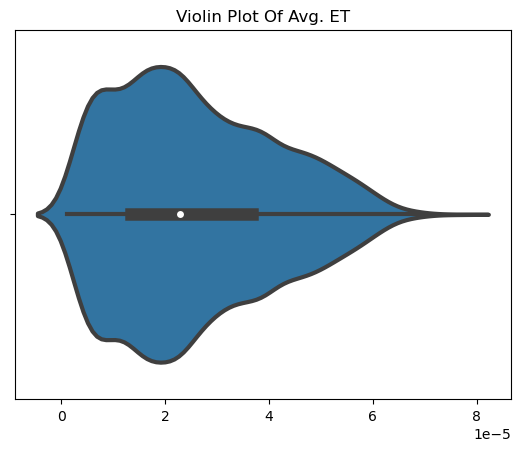

<Figure size 1000x600 with 0 Axes>

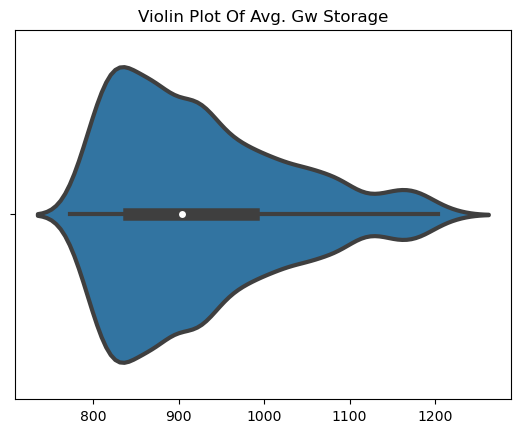

<Figure size 1000x600 with 0 Axes>

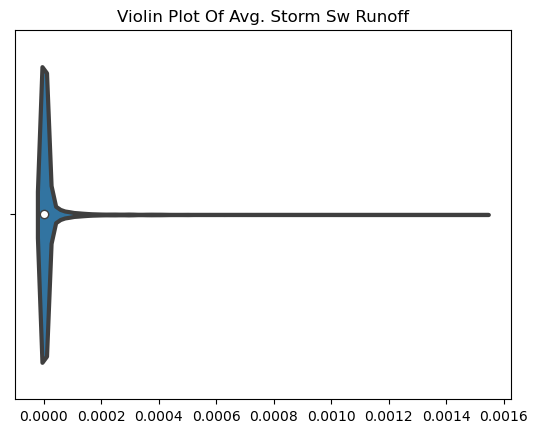

<Figure size 1000x600 with 0 Axes>

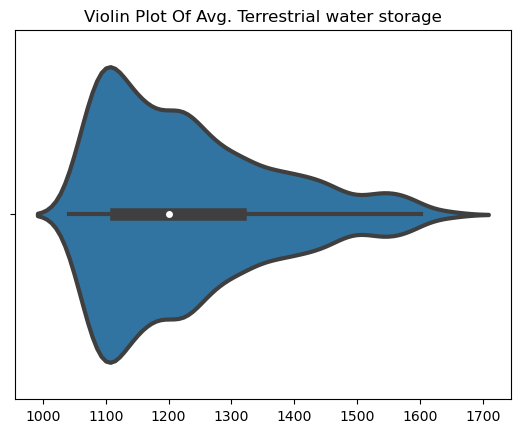

<Figure size 1000x600 with 0 Axes>

In [298]:
parameters = ['Avg. ET', 'Avg. Gw Storage','Avg. Storm Sw Runoff','Avg. Terrestrial water storage']
for param in parameters:
    sb.violinplot(df_copy[param].values,linewidth=3)
    plt.title(f'Violin Plot Of {param}')
    plt.figure(figsize=(10,6))
    plt.show()

**Except for the Average Storm Water Runoff variable, the rest of the variables including the Average Groundwater Storage, Average Terrestrial Water Storage & Average Evapotranspiration have a right skewed distribution, with very little outliers**

#### **Analysis Of Correlation Between The Variables**

In [299]:
# plotting the scatter plot of the remaining variables
fig = px.scatter_matrix(df_copy,
                        dimensions=['Avg. ET','Avg. Gw Storage','Avg. Storm Sw Runoff','Avg. Terrestrial water storage'],
                        title='Scatter plot of the Variables',
                        labels={'Avg. ET':'ET','Avg. Gw Storage':'GW St.','Avg. Storm Sw Runoff':'SW Flow','Avg. Terrestrial water storage':'Terrs. St.'},
                        template='plotly')
fig.show()

In [300]:
# Now Quantifying the relationships using the pearson correlation coefficient
df_copy.corr(method='pearson')

Avg. ET  Avg. Gw Storage  \
Avg. ET                         1.000000         0.729803   
Avg. Gw Storage                 0.729803         1.000000   
Avg. Storm Sw Runoff            0.047674         0.115687   
Avg. Terrestrial water storage  0.753587         0.990619   

                                Avg. Storm Sw Runoff  \
Avg. ET                                     0.047674   
Avg. Gw Storage                             0.115687   
Avg. Storm Sw Runoff                        1.000000   
Avg. Terrestrial water storage              0.173844   

                                Avg. Terrestrial water storage  
Avg. ET                                               0.753587  
Avg. Gw Storage                                       0.990619  
Avg. Storm Sw Runoff                                  0.173844  
Avg. Terrestrial water storage                        1.000000

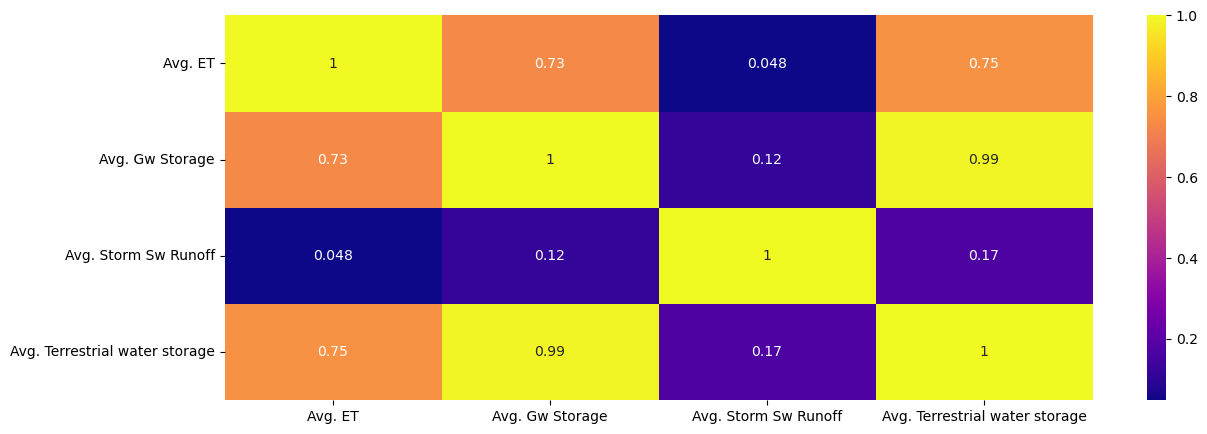

In [301]:
# Plotting the above correlation using a heatmap to further quantify the relationships
plt.figure(figsize=(14,5))
sb.heatmap(df_copy.corr(),cmap='plasma',annot=True)
plt.show()

**From the above we can see that there is a very strong correlation between the following variables**
1. Groundwater Storage & Terrestrial water Storage
2. Evapotranspiration & Groundwater Storage
3. Evapotranspiration & Terrestrial water Storage

#### **TIME SERIES PLOTS**

In [302]:
# plotting the timeseries plots of all the variables
#parameters = ['Avg. ET', 'Avg. Gw Storage','Avg. Storm Sw Runoff','Avg. Terrestrial water storage']
for param in parameters:
    fig = px.line(df_copy,y=param,title=f'Full Time Series for the parameter: {param}')
    fig.update_layout(
        font=dict(size=12, color='black'),
        autosize=False,
        width=1000,
        height=400
    )
    fig.show()

**Checking The Behavior of the Time Series By Clipping the timespan to 1 year and 2 years**

In [303]:
start_year = '2015'
end_year = '2017'
df_2y = df_copy.loc[start_year:end_year]
index_2y = df_2y.index

In [304]:
df_copy.head()

Avg. ET  Avg. Gw Storage  Avg. Storm Sw Runoff  \
date                                                          
2010-01-01  0.000015       883.827648          0.000000e+00   
2010-01-02  0.000015       883.432609          0.000000e+00   
2010-01-03  0.000017       883.026668          3.507778e-10   
2010-01-04  0.000013       882.605022          0.000000e+00   
2010-01-05  0.000013       882.173136          0.000000e+00   

            Avg. Terrestrial water storage  
date                                        
2010-01-01                     1172.229304  
2010-01-02                     1171.363680  
2010-01-03                     1170.348275  
2010-01-04                     1169.410822  
2010-01-05                     1168.653736

In [305]:
df_2015 = df_copy

In [306]:
for param in parameters:
    fig1 = px.line(df_2015,x=df_2015.index,y=param,title=f'Time series plot for {param} for 2015')
    fig1.update_layout(
        font=dict(size=15, color='black')
        )
    fig1.show()

    fig2 = px.line(df_2y,x=index_2y,y=param,title=f'Time Series Plot for {param} from the year 2015 to 2017')
    fig2.update_layout(
        font=dict(size=15, color='black')
        )
    fig2.show()  


**From the Above plots of the Time series, we can see that there is seasonality present in all the variables**

#### **CHECKING FOR STATIONARITY**

In [324]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
#parameters = ['Avg. ET', 'Avg. Gw Storage','Avg. Storm Sw Runoff','Avg. Terrestrial water storage']
def ADF_Test(param_name):
    adf_results = adfuller(df_copy[param_name],autolag='AIC')
    df_adf = pd.Series(adf_results[0:4], index=['Test Statistic','p-value','No. of Lags used','No. of data points used'])
    print('The ADF results are as follows:')
    print(df_adf)
    print()
    print('The critical values are as follows:')
    for key,val in adf_results[4].items():
        print(key,':',val)

def KPSS_Test(param_name):
    kpss_results = kpss(df_copy[param_name],'ct')
    df_kpss = pd.Series(kpss_results[0:3],index=['Test Statistic','p-value','No. of Lags used'])
    print(f'The results of the KPSS test is as follows: ')
    print(df_kpss)
    print()
    print('The critical values are as follows')
    for key,val in kpss_results[3].items():
        print(key,':',val)

1. **Average Evapotranspiration**

In [325]:
# adf test
ADF_Test(param_name='Avg. ET')

The ADF results are as follows:
Test Statistic               -5.433796
p-value                       0.000003
No. of Lags used              9.000000
No. of data points used    4919.000000
dtype: float64

The critical values are as follows:
1% : -3.431680090621068
5% : -2.8621277540961243
10% : -2.5670828625840674


In [326]:
# kpss test
KPSS_Test(param_name='Avg. ET')

The results of the KPSS test is as follows: 
Test Statistic       0.060448
p-value              0.100000
No. of Lags used    41.000000
dtype: float64

The critical values are as follows
10% : 0.119
5% : 0.146
2.5% : 0.176
1% : 0.216


Since from the KPSS test we can conclude that the time series for ET is **Stationary** & from the ADF test we can conclude that the time series for ET is **Non-Stationary**, we can conclude that the time series is not strictly stationary i.e., it is Trend stationary. To make it strictly stationary, the trend has to be removed and then stationarity analysis has to be done. 

2. **Average Groundwater Storage**

In [327]:
# adf test
ADF_Test(param_name='Avg. Gw Storage')

The ADF results are as follows:
Test Statistic            -7.401266e+00
p-value                    7.544304e-11
No. of Lags used           3.200000e+01
No. of data points used    4.896000e+03
dtype: float64

The critical values are as follows:
1% : -3.4316863422848876
5% : -2.8621305160249073
10% : -2.567084332870437


In [328]:
# kpss test
KPSS_Test(param_name='Avg. Gw Storage')

The results of the KPSS test is as follows: 
Test Statistic       0.088161
p-value              0.100000
No. of Lags used    42.000000
dtype: float64

The critical values are as follows
10% : 0.119
5% : 0.146
2.5% : 0.176
1% : 0.216


Here too the KPSS test is indicating that the time series for GW Storage is **Stationary** & the ADF test is indicating that =the time series for GW Storage is **Non-Stationary**, the time series is not strictly stationary i.e., it is Trend stationary. To make it strictly stationary, the trend has to be removed and then stationarity analysis has to be done. 

3. **Average Storm Surface Runoff**

In [329]:
# adf test
ADF_Test(param_name='Avg. Storm Sw Runoff')

The ADF results are as follows:
Test Statistic            -8.000412e+00
p-value                    2.342199e-12
No. of Lags used           2.800000e+01
No. of data points used    4.900000e+03
dtype: float64

The critical values are as follows:
1% : -3.4316852508209417
5% : -2.862130033826382
10% : -2.567084076176593


In [313]:
# kpss test
KPSS_Test(param_name='Avg. Storm Sw Runoff')

The results of the KPSS test is as follows: 
Test Statistic       0.02737
p-value              0.10000
No. of Lags used    32.00000
dtype: float64

The critical values are as follows
10% : 0.119
5% : 0.146
2.5% : 0.176
1% : 0.216


The Stationarity test of the variable Surface Water Runoff also is yeilding the same result, i.e., the time series is not strictly stationary i.e., it is Trend stationary.

4. **Terrestrial Water Storage**

In [314]:
# adf test
ADF_Test(param_name='Avg. Terrestrial water storage')

The ADF results are as follows:
Test Statistic            -8.151810e+00
p-value                    9.650903e-13
No. of Lags used           2.900000e+01
No. of data points used    4.899000e+03
dtype: float64

The critical values are as follows:
1% : -3.4316855235197457
5% : -2.86213015430217
10% : -2.5670841403107416


In [315]:
# kpss test
KPSS_Test(param_name='Avg. Terrestrial water storage')

The results of the KPSS test is as follows: 
Test Statistic       0.081948
p-value              0.100000
No. of Lags used    42.000000
dtype: float64

The critical values are as follows
10% : 0.119
5% : 0.146
2.5% : 0.176
1% : 0.216


The Stationarity test of the variable Terrestrial water storage also is yeilding the same result, i.e., the time series is not strictly stationary i.e., it is Trend stationary.

#### **DECOMPOSING THE TIME SERIES**

In [316]:
from statsmodels.tsa.seasonal import seasonal_decompose as sd

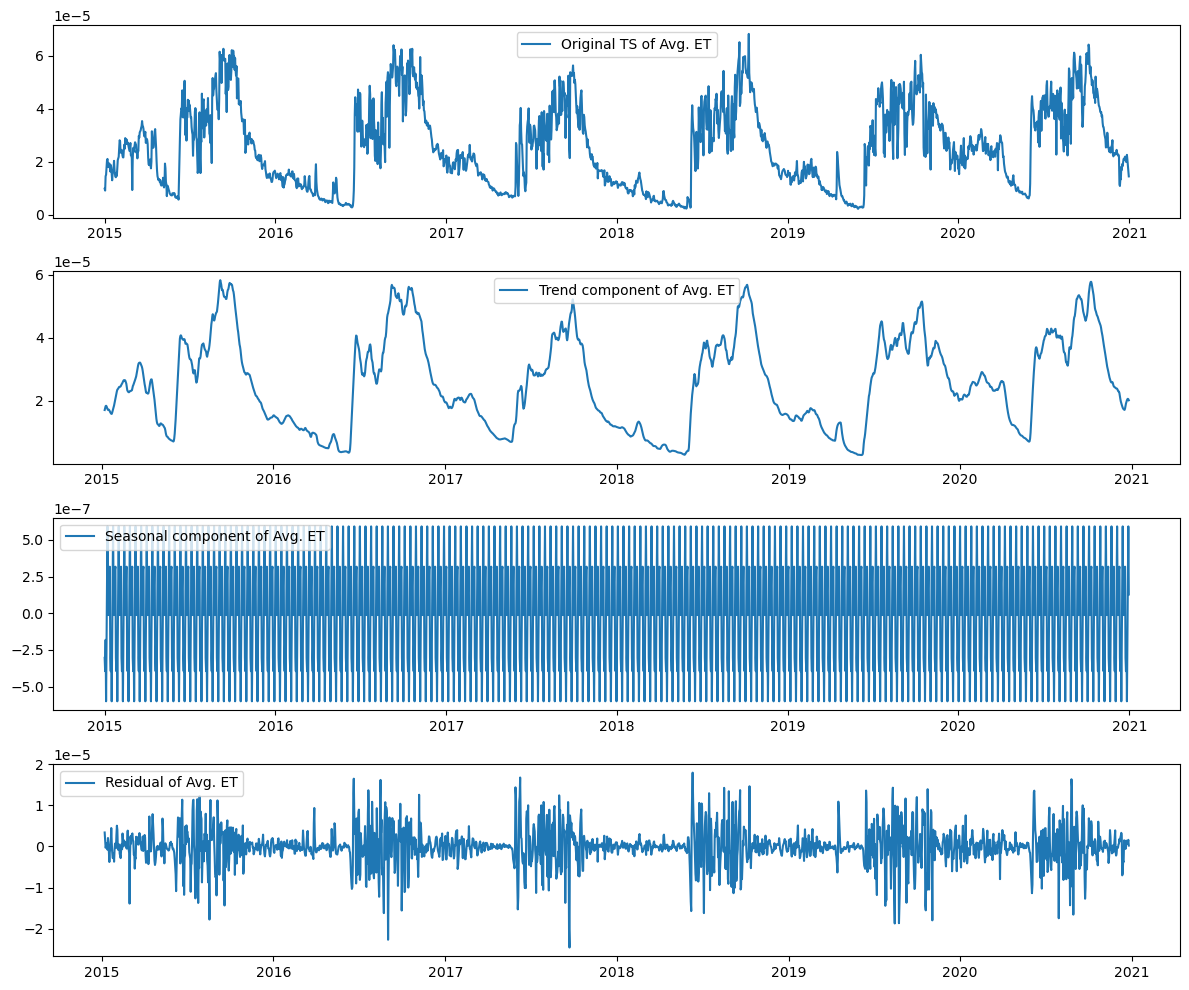

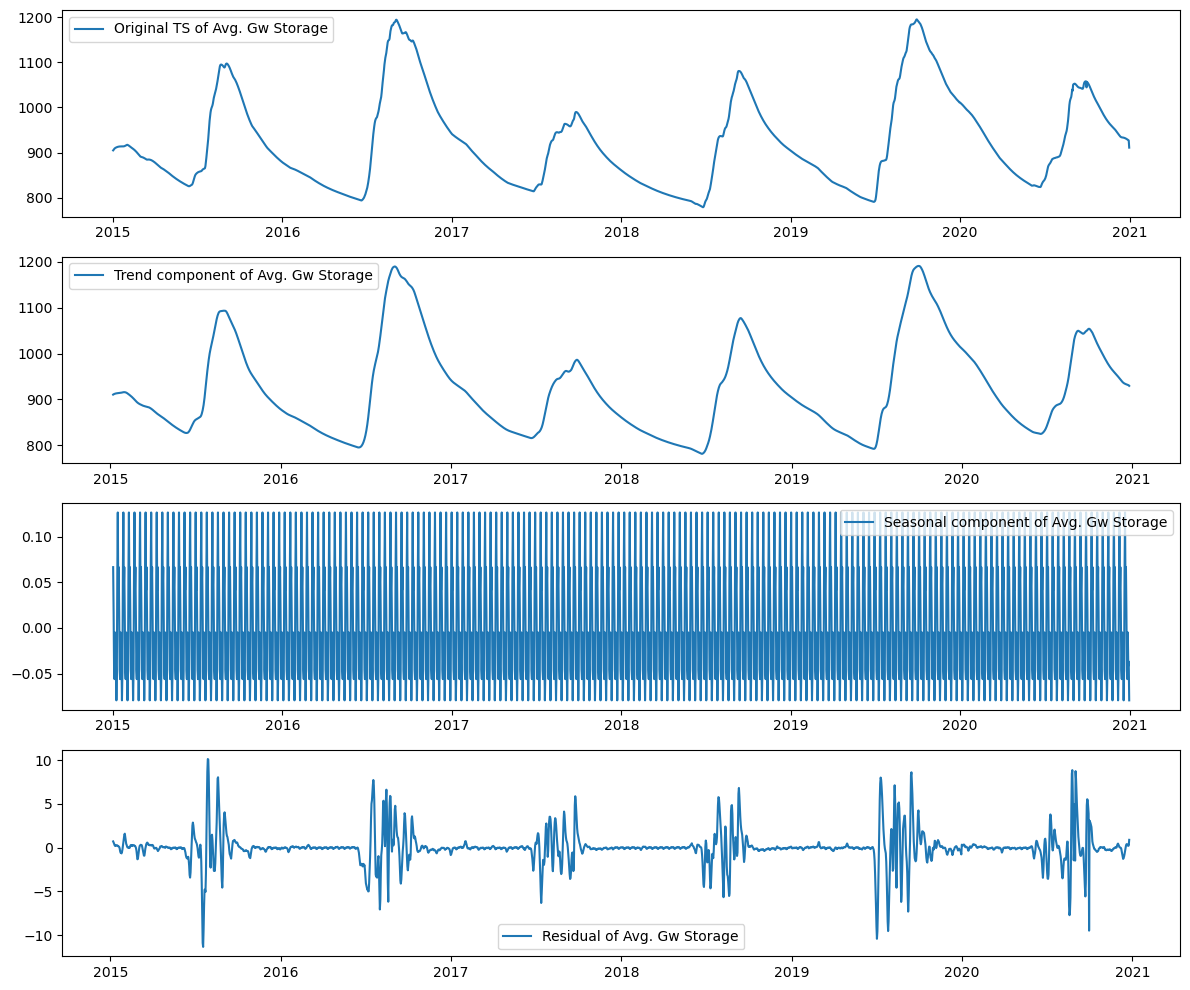

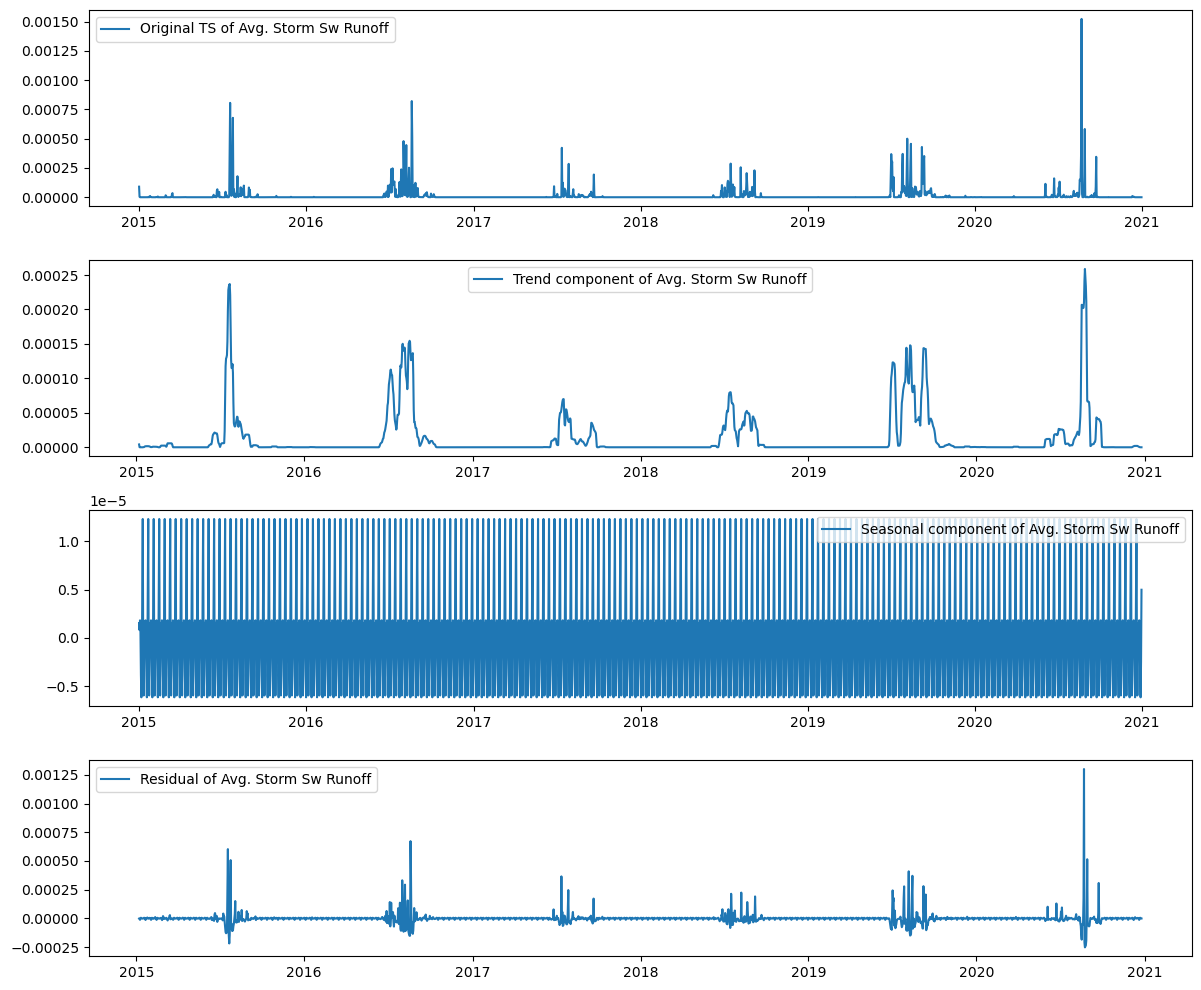

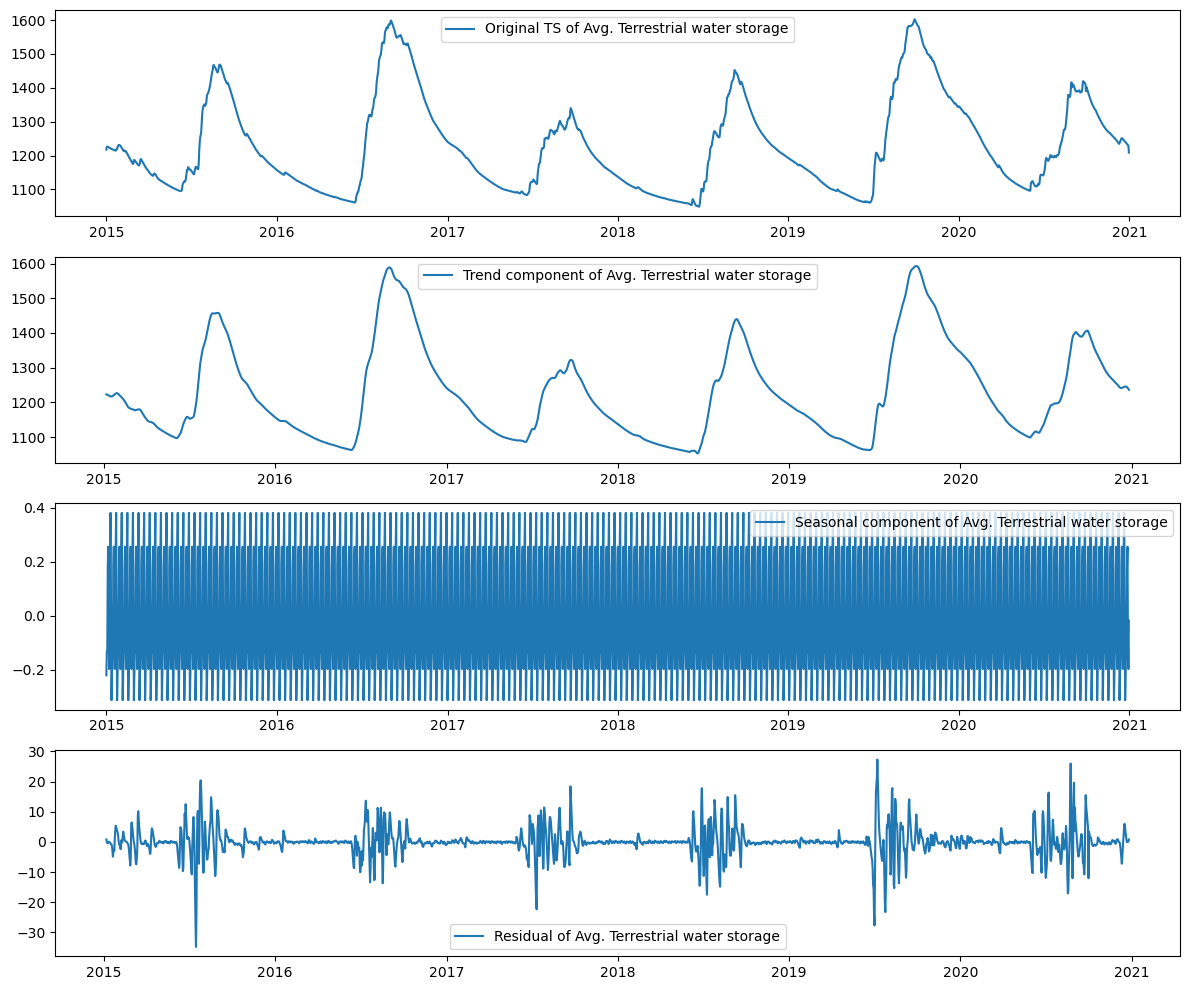

In [317]:
#parameters = ['Avg. ET', 'Avg. Gw Storage','Avg. Storm Sw Runoff','Avg. Terrestrial water storage']

for param in parameters:
    TS = df_copy[param]['2015':'2020']
    decomposed = sd(TS,model='additive',period=12)
    trend = decomposed.trend
    seasonal = decomposed.seasonal
    residual = decomposed.resid

    plt.figure(figsize=(12,10))

    plt.subplot(411)
    plt.plot(TS,label=f'Original TS of {param}')
    plt.legend(loc='best')

    plt.subplot(412)
    plt.plot(trend,label=f'Trend component of {param}')
    plt.legend(loc='best')

    plt.subplot(413)
    plt.plot(seasonal,label=f'Seasonal component of {param}')
    plt.legend(loc='best')

    plt.subplot(414)
    plt.plot(residual,label=f'Residual of {param}')
    plt.legend(loc='best')

    plt.tight_layout()

#### **CHECKING THE AUTOCORRELATION**

**Lag Plots**

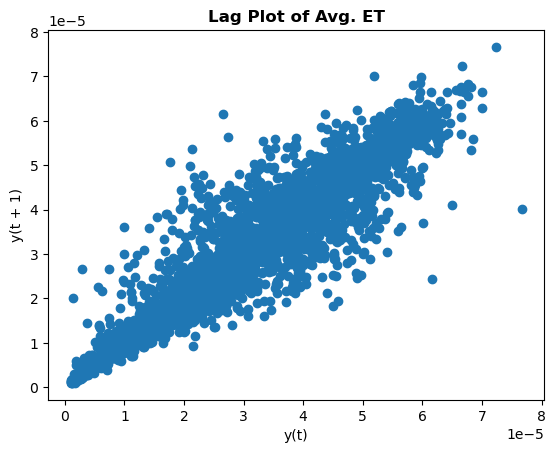

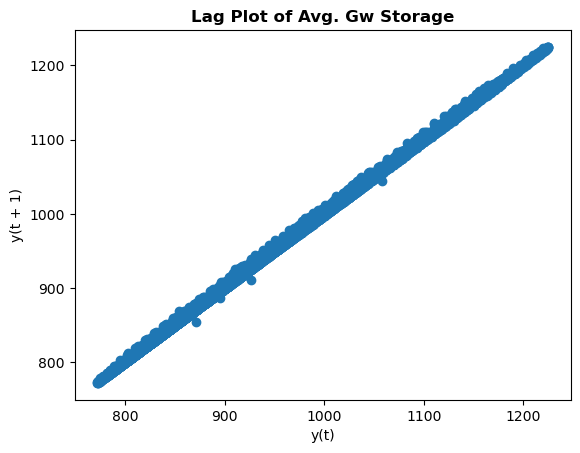

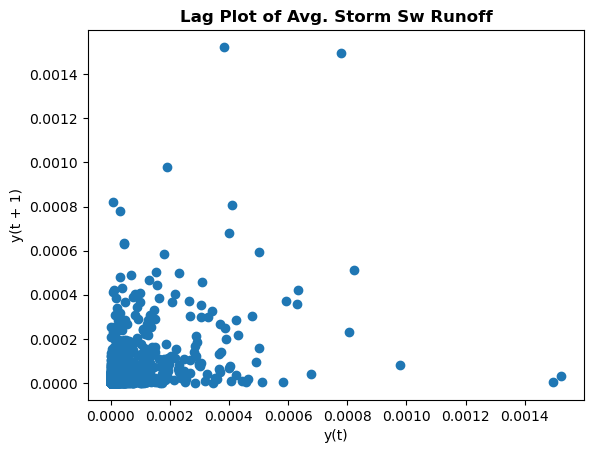

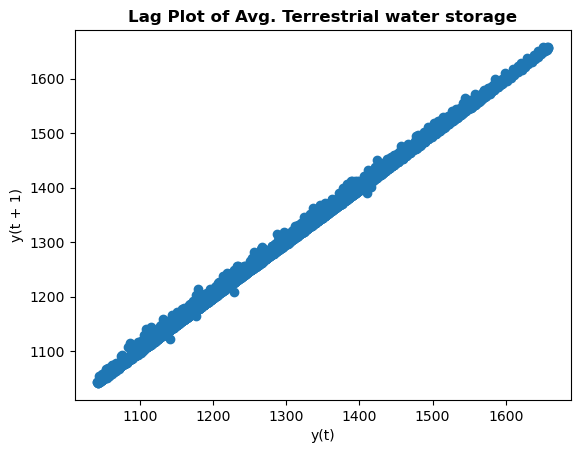

In [318]:
#parameters = ['Avg. ET', 'Avg. Gw Storage','Avg. Storm Sw Runoff','Avg. Terrestrial water storage']
for param in parameters:
    pd.plotting.lag_plot(df_copy[param],lag=1)
    plt.title(f'Lag Plot of {param}',fontweight='bold')
    plt.show()

**From the above plots we can conclude that there is a high correlation between the present values and the past values of the variables: ET, TWS and GWS**

**Autocorrelation plots**

1. **Average ET**

In [330]:
# resampling the data
resampled_ET = df_copy["2014":"2016"]["Avg. ET"].resample('M').mean()
resampled_ET[:5]

date
2014-01-31    0.000023
2014-02-28    0.000029
2014-03-31    0.000033
2014-04-30    0.000023
2014-05-31    0.000013
Freq: M, Name: Avg. ET, dtype: float64

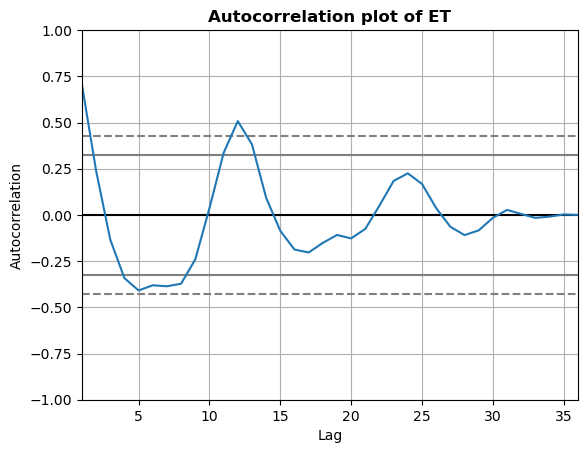

<Figure size 1200x300 with 0 Axes>

In [331]:
pd.plotting.autocorrelation_plot(resampled_ET)
plt.title("Autocorrelation plot of ET",fontweight='bold')
plt.figure(figsize=(12,3))
plt.show()

2. **Average Groundwater Storage**

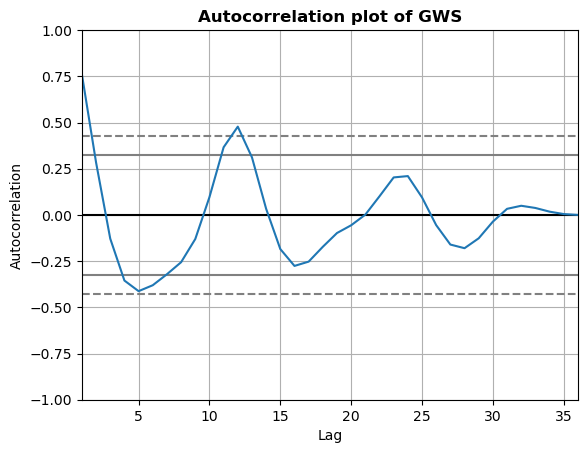

<Figure size 1200x300 with 0 Axes>

In [332]:
#parameters = ['Avg. ET', 'Avg. Gw Storage','Avg. Storm Sw Runoff','Avg. Terrestrial water storage']
resampled_GWS = df_copy["2014":"2016"]["Avg. Gw Storage"].resample('M').mean()
pd.plotting.autocorrelation_plot(resampled_GWS)
plt.title("Autocorrelation plot of GWS",fontweight='bold')
plt.figure(figsize=(12,3))
plt.show()

3. **Storm Water Runoff**

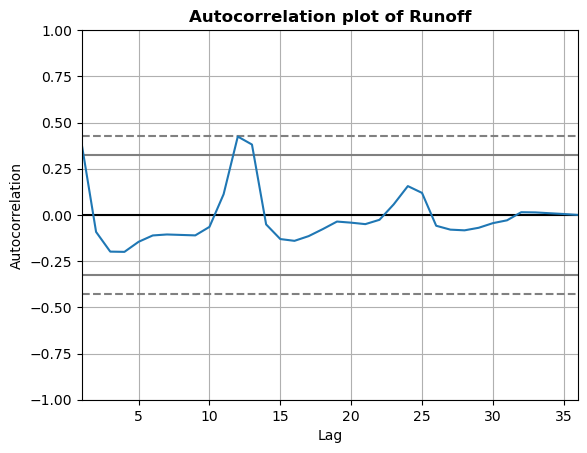

<Figure size 1200x300 with 0 Axes>

In [333]:
resampled_Runoff = df_copy["2014":"2016"]["Avg. Storm Sw Runoff"].resample('M').mean()
pd.plotting.autocorrelation_plot(resampled_Runoff)
plt.title("Autocorrelation plot of Runoff",fontweight='bold')
plt.figure(figsize=(12,3))
plt.show()

4. **Terrestrial Water Storage**

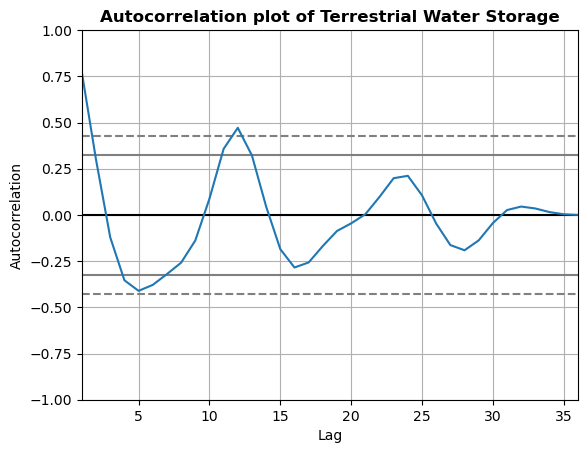

<Figure size 1200x300 with 0 Axes>

In [334]:
resampled_TWS = df_copy["2014":"2016"]["Avg. Terrestrial water storage"].resample('M').mean()
pd.plotting.autocorrelation_plot(resampled_TWS)
plt.title("Autocorrelation plot of Terrestrial Water Storage",fontweight='bold')
plt.figure(figsize=(12,3))
plt.show()

**The solid lines indicate 90% confidence intervals, whereas the dotted lines indicate 95% confidence intervals**. From the above autocorrelation plots we can conclude the following:

1. The autocorrelation between the variables Terrestrial Water Storage, Groundwater Storage, Evapotranspiration with its respective lags are strong till a span a little more than one year. 

2. Whereas for the variable Storm water runoff, a strong autocorrelation exists only upto a year.